# Preliminaries

In this lab, we will briefly walk through the datasets used throughout the class, and apply some basic data loading, visualization, and processing

In [1]:
!pip3 install xlrd==1.2.0
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.18ubuntu0.18.04.1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.18ubuntu0.18.04.1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline

# 1. Data loading

## 1.1. Read data with pandas



In [3]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Advertising.csv?inline=false', usecols=[1,2,3,4])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df = pd.read_excel('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Default.xlsx?inline=false')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [5]:
df = pd.read_excel('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Default2.xlsx?inline=false', engine='openpyxl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


## 1.2. Print the loaded data

In [6]:
df = pd.read_excel('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Default.xlsx?inline=false')
df.head(3)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947


In [7]:
df.tail(3)

,Unnamed: 0,default,student,balance,income
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365
9999,10000,No,Yes,200.922183,16862.952321


In [8]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Advertising.csv?inline=false', usecols=[1,2,3,4])
df[['Radio', 'TV', 'Newspaper']].describe()

,Radio,TV,Newspaper
count,200.000000,200.000000,200.000000
mean,23.264000,147.042500,30.554000
std,14.846809,85.854236,21.778621
min,0.000000,0.700000,0.300000
25%,9.975000,74.375000,12.750000
50%,22.900000,149.750000,25.750000
75%,36.525000,218.825000,45.100000
max,49.600000,296.400000,114.000000


## 1.3. Select a few features from the data

In [9]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Hitters.csv?inline=false')
df.head(3)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A


In [10]:
feature_names = ['Years', 'Hits']

X = df[feature_names]
X.head()

,Years,Hits
0,1,66
1,14,81
2,3,130
3,11,141
4,2,87


## 1.4. Add a new feature to the data

In [11]:
credit = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Credit.csv?inline=false', usecols=list(range(1,12)))
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [12]:
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


## 1.5. Removing features from the data

In [13]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Heart.csv?inline=false')
df.head(3)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [14]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Heart.csv?inline=false').drop('Unnamed: 0', axis=1).dropna()
df.head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [15]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Heart.csv?inline=false').drop('ChestPain', axis=1).dropna()
df.head(3)

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


# 2. Visualization

## 2.1. Scatter plot 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


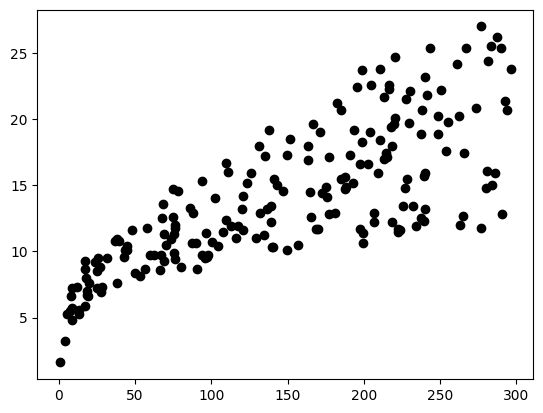

In [16]:
advertising = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Advertising.csv?inline=false', usecols=[1,2,3,4])
advertising.info()

X = advertising.TV
y = advertising.Sales

plt.scatter(X, y,  color='black')

plt.show()

## 2.2. Histogram

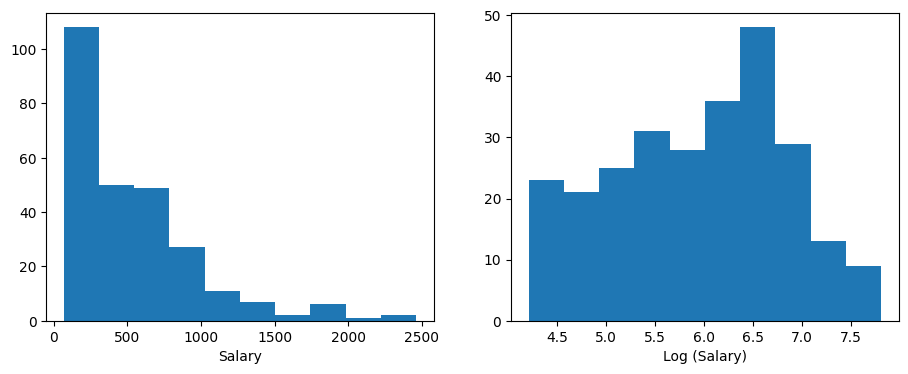

In [17]:
df = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Hitters.csv?inline=false').dropna()
df.head(3)

# Prepare X, y
feature_names = ['Years', 'Hits']
X = df[feature_names].values
y = np.log(df['Salary'].values)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.hist(df['Salary'].values)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log (Salary)');
plt.show()

## 2.3. Overlaying multiple plots

(0.0, 333.25527471319606)

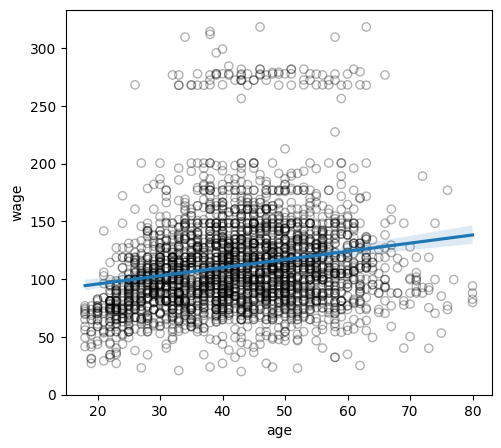

In [18]:
df_wage = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Wage.csv?inline=false')
df_wage.head(3)

fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
ax.scatter(df_wage.age, df_wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(data=df_wage, x='age', y='wage', order=1, truncate=True, scatter=False, ax=ax, ci=100)
ax.set_ylim(ymin=0)

# 3. Data processing

## 3.1. Normalizing the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


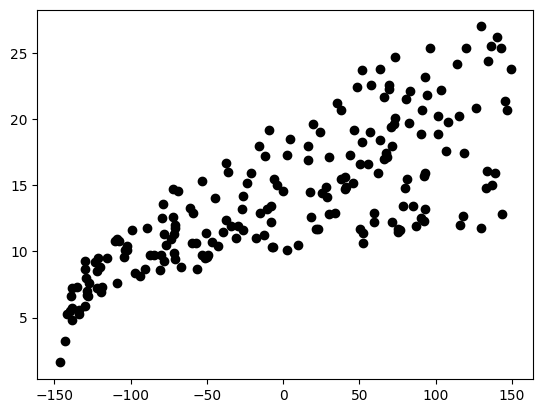

In [19]:
advertising = pd.read_csv('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Advertising.csv?inline=false', usecols=[1,2,3,4])
advertising.info()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

plt.scatter(X, y,  color='black')

plt.show()

## 3.2. Factorizing the data

In [20]:
df = pd.read_excel('https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Default.xlsx?inline=false')
df.head(3)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947


In [21]:
# factorize() returns two objects: a label array and an array with the unique values
df['default'], target_names = df['default'].factorize()
df['student'], _ = df['student'].factorize()

print('Target names:', target_names)
df.head(3)

Target names: Index(['No', 'Yes'], dtype='object')


,Unnamed: 0,default,student,balance,income
0,1,0,0,729.526495,44361.625074
1,2,0,1,817.180407,12106.134700
2,3,0,0,1073.549164,31767.138947


# Exercise

1. Load "/content/drive/MyDrive/ml-practice-lg-2024-spring/Notebooks/Data/Auto.csv" and print the first and the last 5 rows of the dataset.
2. Print the dataset description using the info() function to find out how many data there is.
3. Select only the 'horsepower' and 'mpg' features.
4. Plot the scatter plot of the ('horsepower', 'mpg') from the loaded dataset.
5. Plot the histogram of the 'horsepower' values from the loaded dataset.

In [22]:
# Load https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Data/Auto.csv?inline=false


In [23]:
# Print the first 5 rows of the dataset



In [24]:
# Print the last 5 rows of the dataset.



In [25]:
# Print the dataset description using the info() function to find out how many data there is.



In [26]:
# Select only the 'horsepower' and 'mpg' features.



In [27]:
# Plot the scatter plot of the ('horsepower', 'mpg') from the loaded dataset.



In [28]:
# Plot the histogram of the 'horsepower' values from the loaded dataset.

